In [2]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision.transforms import Compose, ToTensor, Normalize, Lambda, Resize
from medmnist import INFO, DermaMNIST
from transformers import ViTForImageClassification
from transformers import AdamW

def load_data(data_flag='dermamnist', batch_size=16):
    n_classes = len(INFO[data_flag]['label'])
    transform = Compose([
        Resize((224, 224)),
        ToTensor(),
        # Lambda(lambda x: x.repeat(3, 1, 1)),
        Normalize(mean=[0.5]*3, std=[0.5]*3)
    ])

    train_dataset = DermaMNIST(split='train', transform=transform, download=True)
    val_dataset = DermaMNIST(split='val', transform=transform, download=True)
    test_dataset = DermaMNIST(split='test', transform=transform, download=True)

    train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False)
    test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

    return train_loader, val_loader, test_loader, n_classes

def setup_model(n_classes):
    model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224-in21k', num_labels=n_classes)
    return model

def train_and_evaluate(model, train_loader, val_loader, device):
    model.to(device)
    optimizer = AdamW(model.parameters(), lr=1e-4)
    criterion = nn.CrossEntropyLoss()

    best_accuracy = 0
    best_model_path = 'best_model.pth'

    model.train()
    for epoch in range(10):
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            labels = labels.squeeze(1).long()

            outputs = model(images).logits
            loss = criterion(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        model.eval()
        total, correct = 0, 0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                labels = labels.squeeze(1).long()

                outputs = model(images).logits
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        accuracy = 100 * correct / total
        print(f'Epoch {epoch+1}, Loss: {loss.item()}, Validation Accuracy: {accuracy}%')

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            torch.save(model.state_dict(), best_model_path)
            print(f"Best model saved with accuracy: {accuracy}% at epoch {epoch+1}")

    print(f'Training complete. Best model was saved with an accuracy of {best_accuracy}%.')




def main():
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    train_loader, val_loader, test_loader, n_classes = load_data()
    model = setup_model(n_classes)
    train_and_evaluate(model, train_loader, val_loader, device)

if __name__ == '__main__':
    main()

Using downloaded and verified file: C:\Users\metho\.medmnist\dermamnist.npz
Using downloaded and verified file: C:\Users\metho\.medmnist\dermamnist.npz
Using downloaded and verified file: C:\Users\metho\.medmnist\dermamnist.npz


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1, Loss: 0.6928695440292358, Validation Accuracy: 76.76969092721835%
Best model saved with accuracy: 76.76969092721835% at epoch 1
Epoch 2, Loss: 0.2188355177640915, Validation Accuracy: 74.87537387836491%
Epoch 3, Loss: 0.3292660713195801, Validation Accuracy: 78.36490528414755%
Best model saved with accuracy: 78.36490528414755% at epoch 3
Epoch 4, Loss: 0.6886059641838074, Validation Accuracy: 80.85742771684946%
Best model saved with accuracy: 80.85742771684946% at epoch 4
Epoch 5, Loss: 0.511353075504303, Validation Accuracy: 80.55832502492522%
Epoch 6, Loss: 0.09351159632205963, Validation Accuracy: 79.46161515453639%
Epoch 7, Loss: 0.07883868366479874, Validation Accuracy: 76.07178464606181%
Epoch 8, Loss: 0.006675013806670904, Validation Accuracy: 80.6580259222333%
Epoch 9, Loss: 0.024769090116024017, Validation Accuracy: 80.05982053838484%
Epoch 10, Loss: 0.061040811240673065, Validation Accuracy: 75.97208374875373%
Training complete. Best model was saved with an accuracy 

Using downloaded and verified file: C:\Users\metho\.medmnist\dermamnist.npz


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Test Accuracy: 80.14962593516209%


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

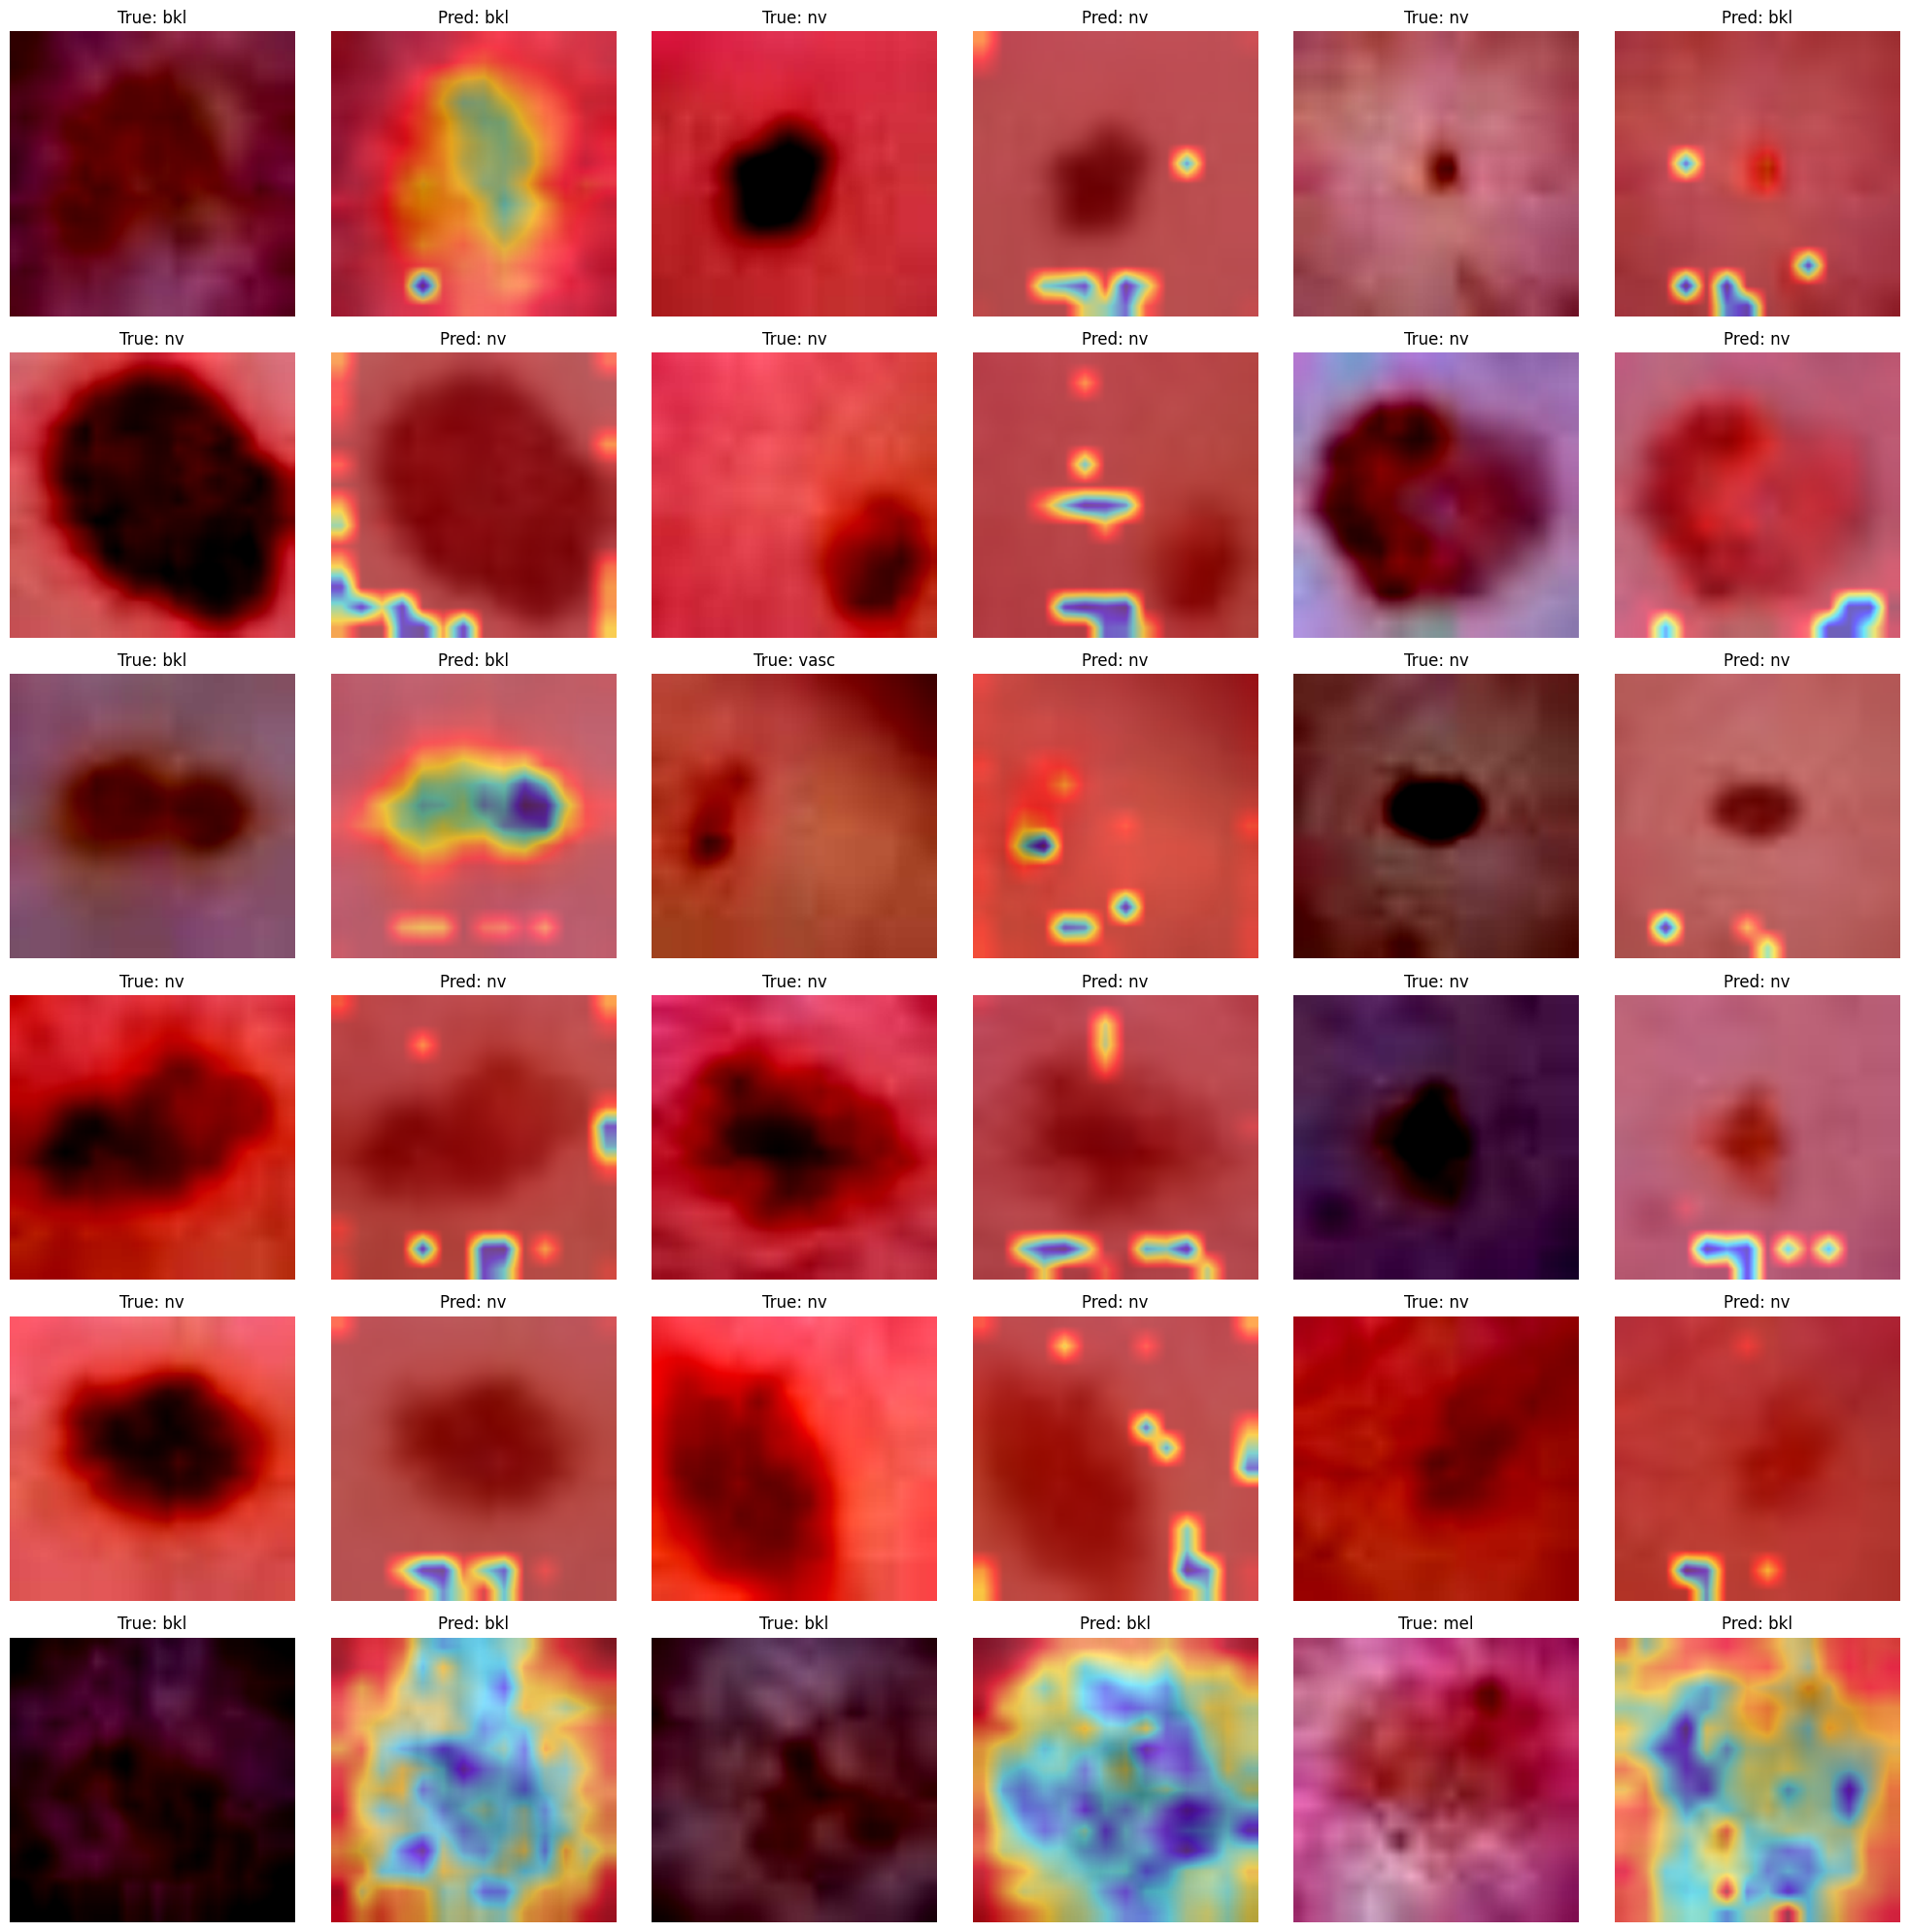

Confusion Matrix:
 [[  39   12   10    0    4    1    0]
 [  12   58   12    5    2    8    6]
 [  14    8  147    2   15   33    1]
 [   2    3    1   11    0    6    0]
 [   4    4   32    1  111   68    3]
 [   6    8   68    2   40 1215    2]
 [   0    0    0    0    0    3   26]]
Shape of Confusion Matrix: (7, 7)


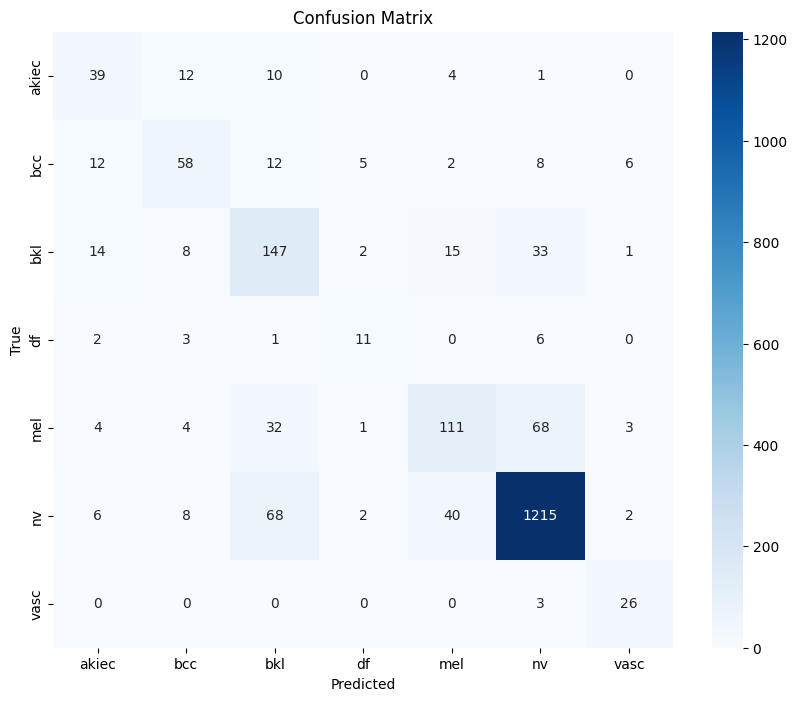


Classification Report:

              precision    recall  f1-score   support

       akiec     0.5065    0.5909    0.5455        66
         bcc     0.6237    0.5631    0.5918       103
         bkl     0.5444    0.6682    0.6000       220
          df     0.5238    0.4783    0.5000        23
         mel     0.6453    0.4978    0.5620       223
          nv     0.9108    0.9060    0.9084      1341
        vasc     0.6842    0.8966    0.7761        29

    accuracy                         0.8015      2005
   macro avg     0.6341    0.6573    0.6405      2005
weighted avg     0.8053    0.8015    0.8012      2005



In [3]:
import torch
from torch.utils.data import DataLoader
from torchvision.transforms import Compose, ToTensor, Normalize, Lambda, Resize
from medmnist import DermaMNIST
from transformers import ViTForImageClassification
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import cv2
import random

CLASS_NAMES = ["akiec", "bcc", "bkl", "df", "mel", "nv", "vasc"]

def load_test_data(batch_size=16):
    transform = Compose([
        Resize((224, 224)),
        ToTensor(),
        Normalize(mean=[0.5]*3, std=[0.5]*3)
    ])
    test_dataset = DermaMNIST(split='test', transform=transform, download=True)
    test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)
    return test_loader

def load_model(n_classes, model_path='best_model.pth'):
    model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224-in21k', num_labels=n_classes, output_attentions=True)
    model.load_state_dict(torch.load(model_path))
    return model

def visualize_attention(image, attentions, label, pred, layer_idx=11, head_idx=0):
    attention = attentions[layer_idx][0, head_idx]
    attention = attention[1:, 1:]
    attention = attention.mean(dim=0)
    grid_size = int(np.sqrt(attention.shape[0]))
    attention = attention.view(grid_size, grid_size).detach().cpu().numpy()
    attention = cv2.resize(attention, (image.shape[2], image.shape[1]))
    attention = (attention - attention.min()) / (attention.max() - attention.min())
    heatmap = cv2.applyColorMap(np.uint8(255 * attention), cv2.COLORMAP_JET)
    heatmap = np.float32(heatmap) / 255
    image = image.permute(1, 2, 0).cpu().numpy()
    image = (image - image.min()) / (image.max() - image.min())
    superimposed_img = heatmap + image
    superimposed_img = superimposed_img / np.max(superimposed_img)
    return superimposed_img, label, pred

def evaluate(model, test_loader, device, num_images_to_plot=18):
    model.to(device)
    model.eval()
    total, correct = 0, 0
    all_labels, all_preds = [], []
    selected_images = {}
    random_indices = random.sample(range(len(test_loader.dataset)), num_images_to_plot)
    with torch.no_grad():
        for i, (images, labels) in enumerate(test_loader):
            images, labels = images.to(device), labels.to(device)
            labels = labels.squeeze(1).long()
            outputs = model(images)
            attentions = outputs.attentions
            logits = outputs.logits
            _, predicted = torch.max(logits.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())
            for idx in range(images.size(0)):
                global_idx = i * test_loader.batch_size + idx
                if global_idx in random_indices:
                    selected_images[global_idx] = (images[idx], [att[idx].unsqueeze(0) for att in attentions], labels[idx].item(), predicted[idx].item())
    accuracy = 100 * correct / total
    print(f'Test Accuracy: {accuracy}%')
    plot_selected_images(selected_images)
    return all_labels, all_preds

def plot_selected_images(selected_images):
    fig, axes = plt.subplots(6, 6, figsize=(20, 20))
    axes = axes.flatten()
    for i, (global_idx, (image, attentions, label, pred)) in enumerate(selected_images.items()):
        img_with_attention, true_label, pred_label = visualize_attention(image, attentions, CLASS_NAMES[label], CLASS_NAMES[pred])
        
        # 原始图像
        axes[2*i].imshow(image.permute(1, 2, 0).cpu().numpy())
        axes[2*i].set_title(f'True: {CLASS_NAMES[label]}')
        axes[2*i].axis('off')

        # 注意力图像
        axes[2*i+1].imshow(img_with_attention)
        axes[2*i+1].set_title(f'Pred: {CLASS_NAMES[pred]}')
        axes[2*i+1].axis('off')

    plt.tight_layout()
    plt.show()

def plot_confusion_matrix(labels, preds, n_classes):
    cm = confusion_matrix(labels, preds, labels=range(n_classes))
    print("Confusion Matrix:\n", cm)
    print("Shape of Confusion Matrix:", cm.shape)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=CLASS_NAMES, yticklabels=CLASS_NAMES)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

def print_classification_report(labels, preds):
    report = classification_report(labels, preds, target_names=CLASS_NAMES, digits=4)
    print("\nClassification Report:\n")
    print(report)

def main():
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    test_loader = load_test_data()
    n_classes = len(CLASS_NAMES)
    model = load_model(n_classes)
    num_images_to_plot = 18  # number of images you want to plot
    labels, preds = evaluate(model, test_loader, device, num_images_to_plot)
    plot_confusion_matrix(labels, preds, n_classes)
    print_classification_report(labels, preds)

if __name__ == '__main__':
    main()
